In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [12]:
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud") 
print(f"path to dataset: {path}")     

path to dataset: /Users/chaitanyayadav/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [14]:
import os
df = pd.read_csv(os.path.join(path, "creditcard.csv"))
print(f"Data shape: {df.shape}")
print(f"Data columns: {df.columns.tolist()}")
df.head()

Data shape: (284807, 31)
Data columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


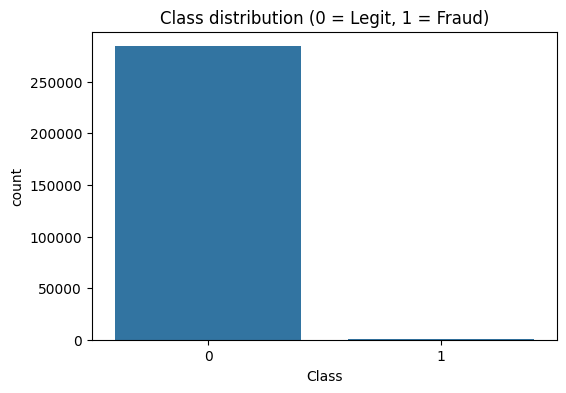

In [15]:
print(df['Class'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class distribution (0 = Legit, 1 = Fraud)")
plt.show()


In [20]:
fraud_counts = df['Class'].value_counts()
print(f"Total frauds : {fraud_counts[1]}") 
print(f"fraud percentage: {fraud_counts[1] / fraud_counts.sum() * 100}")

Total frauds : 492
fraud percentage: 0.1727485630620034


In [22]:
scaler = StandardScaler()
df['norm_amount'] = scaler.fit_transform(df[['Amount']])
df['norm_time'] = scaler.fit_transform(df[['Time']])

df.drop(['Amount', 'Time'], axis=1)

X = df.drop("Class", axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Test shape: {X_test.shape}\nTrain shape: {X_train.shape}")

Test shape: (56962, 32)
Train shape: (227845, 32)
